<img style="float:right" src="images/logo_va.png" /> 

# Visione Artificiale
## Esercitazione: Operazioni sulle immagini

### Sommario
* Creazione e modifica di immagini grayscale memorizzate come array NumPy
* Confronto fra velocità di esecuzione di cicli Python e corrispondenti istruzioni NumPy
* Caricamento di immagini da file
* Semplici operazioni su immagini RGB e grayscale
* Binarizzazione di immagini grayscale: con soglia globale e locale
* Operazioni aritmetiche fra immagini
* Applicazione di una lookup table
* Conversione da RGB a HSL e modifiche ai valori HSL

Iniziamo con l'importazione dei moduli che ci serviranno: `NumPy`, `OpenCV`, `va`. Importiamo anche la funzione `interact` di Jupyter. 

In [1]:
import numpy as np
import cv2 as cv
import va
from ipywidgets import interact

Un dei moduli che abbiamo appena importato (`cv2`) contiene il wrapper Python della libreria OpenCV (scritta in C++). Tutti gli array (incluse le immagini) utilizzati in OpenCV sono convertite in/da array NumPy.  
Iniziamo dunque a fare pratica con le immagini: eseguendo la prossima cella sarà creata una piccola immagine a toni di grigio contenente valori casuali, con dimensione (7,9) e un byte per pixel.

In [2]:
img = np.random.randint(0,256,(7,9), dtype=np.uint8)
print(img, img.shape, img.dtype)

[[132 154  63 246 166  97 119   6  93]
 [211 157  43  45 110  60 248 218  88]
 [ 60  47  13  60 131  88 177 201  62]
 [ 37 200  56  32 118  95 210  15  41]
 [182   5 192 117  60 140 125 252  46]
 [174  85 138 172 207 142 108 160  72]
 [ 28  27  67 154  78 155  18 163  75]] (7, 9) uint8


Il seguente comando consente di avere rapidamente informazioni sul tipo della variabile `img`.

In [3]:
img?

Type:        ndarray
String form:
[[132 154  63 246 166  97 119   6  93]
           [211 157  43  45 110  60 248 218  88]
           [ 60  47  13  60 1 <...> 0 140 125 252  46]
           [174  85 138 172 207 142 108 160  72]
           [ 28  27  67 154  78 155  18 163  75]]
Length:      7
File:        /usr/lib/python3/dist-packages/numpy/__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` mo

Nella cella seguente utilizziamo la funzione `show` del modulo `va` per visualizzare comodamente l'immagine all'interno del notebook.

""
""

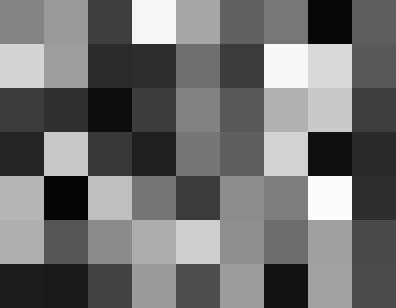

In [4]:
va.show(img)

Tutte le funzionalità disponibili sugli array NumPy sono quindi utilizzabili sulle immagini definite in questo modo. La cella seguente mostra alcuni esempi di *slicing* utilizzato per indicizzare pixel dell'immagine.

""
""

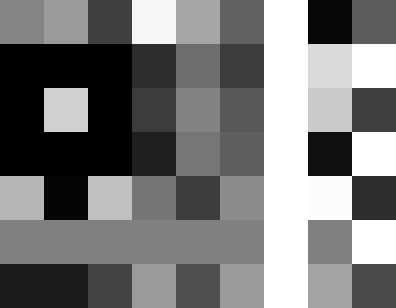

In [5]:
img[2, 1] = 255 - img[2,1] # Cambia il pixel alle coordinate (x=1,y=2) nel suo "negativo"
img[5] = 128 # Tutti i pixel della sesta riga diventano del valore 128
img[:, 6] = 255 # Tutti i pixel della settima colonna diventano bianchi
img[1, :3] = 0 # Pixel (x,1) con x in [0..2] a zero
img[3, :3] = 0 # Pixel (x,3) con x in [0..2] a zero
img[2, :3:2] = 0 # Pixel (0,2) e (2,2) a zero
img[1::2, 8] = 255 # Tutti i pixel (x,y) con y dispari e x=8 diventano bianchi
va.show(img)

La cella seguente calcola la media dei valori di grigio nell'immagine, quindi pone a zero tutti i pixel con valore inferiore alla media e a 255 tutti quelli con valore superiore. Si noti che il confronto fra due immagini (`img1 < avg`) restituisce un array di valori `bool` con le stesse dimensioni dell'immagine (si osservi il contenuto della variabile `tmp`): tale array viene utilizzato per selezionare i soli elementi corrispondenti ai valori `True`, ad esempio con l'istruzione `img1[img1 < avg] = 0`.

img,img1
,

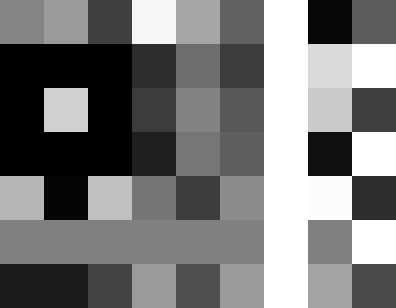
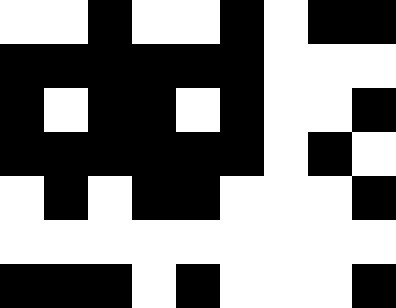

[[False False  True False False  True False  True  True]
 [ True  True  True  True  True  True False False False]
 [ True False  True  True False  True False False  True]
 [ True  True  True  True  True  True False  True False]
 [False  True False  True  True False False False  True]
 [False False False False False False False False False]
 [ True  True  True False  True False False False  True]]


In [6]:
img1 = img.copy()
avg = img1.mean()
img1[img1 < avg] = 0
img1[img1 > avg] = 255
va.show((img, 'img'), (img1, 'img1'))
tmp = img1 < avg
print(tmp)

Le due celle seguenti misurano il tempo di esecuzione dell'istruzione `img1[img1 < avg] = 0` rispetto a una implementazione con cicli in Python. Si nota chiaramente come la prima soluzione sia molto più efficiente. Per quale motivo?

In [7]:
%%timeit
img1[img1 < avg] = 0

2.16 µs ± 8.41 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
%%timeit
h, w = img1.shape
for y in range(h):
    for x in range(w):
        if img1[y, x] < avg:
            img1[y, x] = 0

92.5 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<img style="float:left" src="images/ar.png" /> **Esercizio 1** - Nella prossima cella scrivere il codice Python che crea quattro immagini (`immagine1`, `immagine2`, `immagine3`, `immagine4`) con le caratteristiche specificate qui sotto. Eseguire poi anche la cella successiva che contiene alcuni controlli per verificare che le immagini siano state create correttamente.
1. `immagine1`: immagine grayscale con dimensione 200x256 (larghezza x altezza), tipo di dato dei pixel `np.uint8`; i pixel di ogni colonna devono contenere, dall'alto verso il basso, tutte le possibili sfumature di grigio [0,255]; tutte le colonne devono essere uguali fra loro;
2. `immagine2`: come `immagine1` ma ruotata di 90° in senso antiorario (ovvero la matrice è trasposta);
3. `immagine3`: una copia di `immagine1` in cui tutti i pixel con valore multiplo di 3 sono modificati nel valore 0;
4. `immagine4`: una copia della sotto-immagine di `immagine1` con origine (pixel in alto a sinistra) alle coordinate (100,150) e dimensioni 20x30.

immagine1,immagine2,immagine3,immagine4
,,,

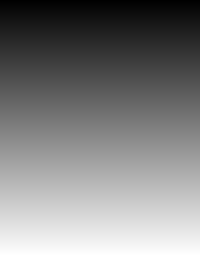
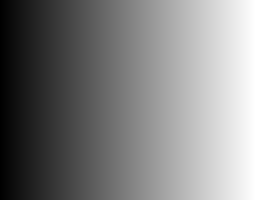
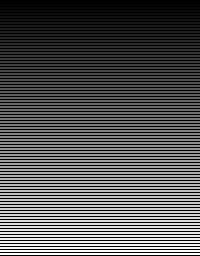
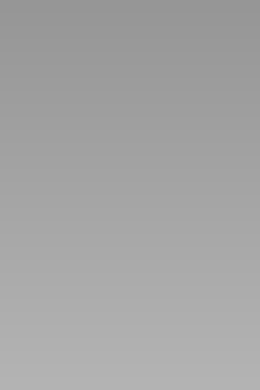

In [17]:
immagine1, immagine2, immagine3, immagine4 = [None] * 4
immagine1 = np.fromfunction(lambda i, j: i, (256, 200), dtype=np.uint8)
immagine2 = np.fromfunction(lambda i, j: j, (200, 256), dtype=np.uint8)
immagine3 = immagine1.copy()
immagine3[immagine3 % 3 == 0] = 0
immagine4 = immagine1.copy()[150:180, 100:120]
# --- Svolgimento Esercizio 1: Inizio --- #



# --- Svolgimento Esercizio 1: Fine --- #
va.show((immagine1, 'immagine1'), (immagine2, 'immagine2'), (immagine3, 'immagine3'), (immagine4, 'immagine4'))

In [18]:
va.test_immagini_1(immagine1, immagine2, immagine3, immagine4)

immagine1,immagine2,immagine3,immagine4
,,,


Ora proseguiamo con alcuni esperimenti su immagini caricate da file. La funzione `cv.imread` carica un'immagine da file e restituisce un array NumPy che ne contiene i pixel. *Attenzione: se il file non esiste, non viene generato un errore: la funzione restituisce `None`*.

In [ ]:
img = cv.imread('file inesistente.jpg')
print(f"Valore se il file non esiste: {img}")
toys = cv.imread('immagini/toys.png')
print(f"Dimensioni: {toys.shape}, totale valori nell'array: {toys.size}, tipo dei pixel: {toys.dtype}")

Si noti che le immagini a colori vengono rappresentate come vettori tridimensionali (altezza, larghezza, canali), con tre canali; attenzione all'ordine: OpenCV memorizza i canali nell'ordine BGR (Blue, Green, Red).  
Osserviamo ora l'effetto di alcune trasformazioni all'array che contiene l'immagine utilizzando tecniche di slicing NumPy.

In [ ]:
va.show(
    (toys, 'Originale'),
    toys[::-1],
    toys[:,::-1],
    toys[::-1,::-1],
    toys[...,::-1],
)
h, w = toys.shape[:2]
h2, w2 = h//2, w//2
va.show(
    toys[:,:w2],
    toys[:h2],
    toys[:h2,:w2],
    toys[:h2:,w2:],
    toys[h2:,:w2:],
    toys[h2:,w2:]
)
va.show(
    toys[...,0],
    toys[...,1],
    toys[...,2],
    toys[::10,::10]
)

<img style="float:left" src="images/ar.png" /> **Esercizio 2** - Utilizzando la funzione `cv.cvtColor`, convertire l'immagine `toys` in grayscale e salvare il risultato in una nuova immagine `gray_toys`. Verificare che l'immagine sia composta da un solo canale e il tipo dei pixel sia `np.uint8`. Creare quindi l'immagine `toys_s` a partire da `gray_toys` dimezzando la luminosità di tutti i pixel con valore superiore a 127 e raddoppiando la luminosità di tutti i restanti.
Calcolare quindi, per ogni riga dell'immagine `gray_toys`, la somma dei valori dei pixel di `toys_s`, memorizzando tali somme in un array NumPy di tipo `np.uint32` con nome `somma_per_righe`. Suggerimento: controllare la documentazione della funzione `np.sum`.  
Eseguire il codice nella cella e quindi eseguire la cella successiva che contiene alcuni controlli per verificare che il risultato sia corretto.

In [ ]:
gray_toys, toys_s, somma_per_righe = [None]*3

# --- Svolgimento Esercizio 2: Inizio --- #



# --- Svolgimento Esercizio 2: Fine --- #

In [ ]:
va.test_immagini_2(gray_toys, toys_s, somma_per_righe)

<img style="float:left" src="images/ar.png" /> **Esercizio 3** - Completare la funzione `binarizza` che deve restituire un'immagine binaria con le stesse dimensioni dell'immagine in ingresso `immagine`: i pixel con valore inferiore o uguale a `soglia` devono avere valore zero, quelli con valore superiore devono avere valore 255. L'esercizio può essere risolto molto rapidamente utilizzando una funzione OpenCV, oppure anche una o più funzioni NumPy.

In [ ]:
def binarizza(immagine, soglia):

    # --- Svolgimento Esercizio 3: Inizio --- #
    
    
    
    # --- Svolgimento Esercizio 3: Fine --- #        

<img style="float:left" src="images/in.png" /> Se l'esercizio precedente è stato svolto correttamente, l'esecuzione della cella seguente consente eseguire in modo interattivo la binarizzazione con soglia globale su alcune immagini.

In [ ]:
@interact(immagine=['toys.png','rice.png','tbbt.jpg','torre.jpg', 'sudoku.jpg'], soglia=(0,255))
def test_binarizza(immagine, soglia = 127):
    t = cv.cvtColor(cv.imread("immagini/" + immagine), cv.COLOR_BGR2GRAY)
    b = binarizza(t, soglia)
    va.show((t, 'Originale'), (b, 'Binarizzata'))

Si può facilmente osservare che un'immagine con illuminazione non uniforme come `sudoku.jpg` non può essere binarizzata correttamente con un'unica soglia per tutti i pixel (soglia globale). Nella cella seguente si può sperimentare il funzionamento di un approccio locale.

In [ ]:
@interact(size = (3,39,2), c = (0,29))
def binarizzazione_adattiva(size = 11, c = 9):
    img = cv.cvtColor(cv.imread("immagini/sudoku.jpg"), cv.COLOR_BGR2GRAY)
    b = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, size, c)
    va.show((img,'Originale'), (b,'ADAPTIVE_THRESH_MEAN_C'))

<img style="float:left" src="images/ar.png" /> **Esercizio 4** - L'immagine `immagini/tbbt-m.png` a prima vista sembra identica a `immagini/tbbt.jpg`, ma qualcuno l'ha modificata inserendo un messaggio nascosto in alcuni pixel del canale verde. Caricare entrambe le immagini, calcolare una terza immagine come differenza pixel a pixel delle due e visualizzare le tre immagini. Quindi, scansionando i pixel per righe (dall'alto al basso, da sinistra a destra), individuare tutti i pixel in cui c'è una differenza fra le due immagini nella componente verde e costruire una stringa i cui caratteri corrispondono ai codici ASCII del valore della componente verde in tali pixel. Suggerimento: per costruire la stringa possono riverlarsi utili le funzioni `chr` e `str.join`.

In [ ]:
# --- Svolgimento Esercizio 4: Inizio --- #



# --- Svolgimento Esercizio 4: Fine --- #

<img style="float:left" src="images/ar.png" /> **Esercizio 5** - Visualizzare l'immagine `immagini/lut.png`, quindi in una variabile chiamata `lut` memorizzarne solo la prima riga: verificare che l'array `lut` abbia tipo `np.uint8` e shape (256,3). A questo punto utilizzare tale array come una *lookup table* da grayscale a BGR, applicandola alle immagini grayscale `immagini/radio1.png` e `immagini/radio2.png`, ottenendo due corrispondendi immagini a colori. Visualizzare le quattro immagini sulla stessa riga. Suggerimento: per caricare le immagini direttamente come grayscale, si può passare `cv.IMREAD_GRAYSCALE` come secondo parametro di `cv.imread`, oppure utilizzare `cv.cvtColor` come già visto in precedenza. *N.B. Si richiede di svolgere questo esercizio senza utilizzare la funzione `cv.applyColorMap`.*

In [ ]:
# --- Svolgimento Esercizio 5: Inizio --- #



# --- Svolgimento Esercizio 5: Fine --- #

<img style="float:left" src="images/ar.png" /> **Esercizio 6** - Caricare l'immagine contenuta nel file `immagini/toys.png` e convertirla in HSV utilizzando `cv.cvtColor`. Separare quindi i tre canali H, S, V (a tale proposito può essere utilizzata la funzione `cv.split` oppure analoghe funzionalità NumPy). Modificare i tre canali HSV in tutti i modi elencati qui sotto, visualizzando poi ciascun risultato dopo aver riconvertito l'immagine in formato BGR. Il risultato deve essere analogo a quanto visto a lezione. Attenzione: ricordarsi che i valori HSV sono memorizzati ciascuno in un byte con H compreso in $[0,180]$, corrispondente a $[0,\pi]$ e S e V compresi in $[0,255]$, corrispondente a $[0,1]$.

Si chiede di visualizzare le seguenti 20 immagini (4 per riga):
+ Originale, Solo canale H (come grayscale), Solo canale S (come grayscale), Solo canale V (come grayscale);
+ Tutti i pixel del canale H allo stesso valore costante, S e V invariati: $H=0$, $H=\pi/4$, $H=\pi/2$, $H=3\pi/4$;
+ Tutti i pixel del canale S allo stesso valore costante, H e V invariati: $S=0$, $S=1/4$, $S=1/2$, $S=1$;
+ Tutti i pixel del canale V allo stesso valore costante, H e S invariati: $V=0$, $V=1/4$, $V=1/2$, $V=1$;
+ Le ultime quattro immagini come segue:
    1. Valori H aumentati di $\pi/4$ (attenzione alla periodicità), S e V invariati,
    2. Valori H aumentati di $\pi/2$ (attenzione alla periodicità), S e V invariati,
    3. Valori V divisi per 2 (divisione intera), H e S invariati,
    4. Valori V divisi per 4 (divisione intera), H e S invariati.

In [ ]:
# --- Svolgimento Esercizio 6: Inizio --- #



# --- Svolgimento Esercizio 6: Fine --- #